In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()


In [8]:
df[['Murder', 'Assault', 'UrbanPop', 'Rape']]=ms.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])


In [9]:
df_norm = df.iloc[:,1:]

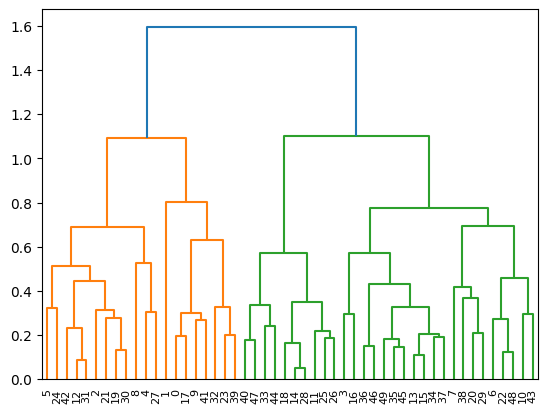

In [10]:
# create dendrogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [16]:
hc.fit(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [18]:
yhc = hc.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [19]:
yhc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [20]:
df["clusters"] = yhc

In [21]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,0.746988,0.654110,0.440678,0.359173,3
1,Alaska,0.554217,0.746575,0.271186,0.961240,4
2,Arizona,0.439759,0.852740,0.813559,0.612403,1
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0
4,California,0.493976,0.791096,1.000000,0.860465,1
5,Colorado,0.427711,0.544521,0.779661,0.811370,1
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0
7,Delaware,0.307229,0.660959,0.677966,0.219638,0
8,Florida,0.879518,0.993151,0.813559,0.635659,1
9,Georgia,1.000000,0.568493,0.474576,0.478036,3


In [22]:
df1 = df.sort_values("clusters")

In [23]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
49,Wyoming,0.361446,0.397260,0.474576,0.214470,0
20,Massachusetts,0.216867,0.356164,0.898305,0.232558,0
29,New Jersey,0.397590,0.390411,0.966102,0.297158,0
16,Kentucky,0.536145,0.219178,0.338983,0.232558,0
15,Kansas,0.313253,0.239726,0.576271,0.276486,0
34,Ohio,0.391566,0.256849,0.728814,0.364341,0
13,Indiana,0.385542,0.232877,0.559322,0.354005,0
35,Oklahoma,0.349398,0.363014,0.610169,0.328165,0
22,Minnesota,0.114458,0.092466,0.576271,0.196382,0
10,Hawaii,0.271084,0.003425,0.864407,0.333333,0


In [25]:
df1[["Unnamed: 0","clusters"]]

,Unnamed: 0,clusters
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0
